In [351]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy import stats

 Load the dataset.

In [340]:
train= pd.read_csv('C://Users/Saba Naseem/Desktop/Machine Learning/Codes/kaggle/House Price Predicion/train.csv')
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


Let's find out features we have in this dataset.

In [341]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Let's drop 'Id' column since it's unnecessary for the prediction process.

In [342]:
train.drop('Id', axis=1, inplace=True)

 A basic description of data.

In [343]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The default setting of "describe" method skips the variables of Object type.
We can apply method "describe" on variables of Object type as follows:

In [344]:
train.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


Let's first analyze our target variable, Sale Price.

In [345]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Let's visualize Sale Price distribution.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


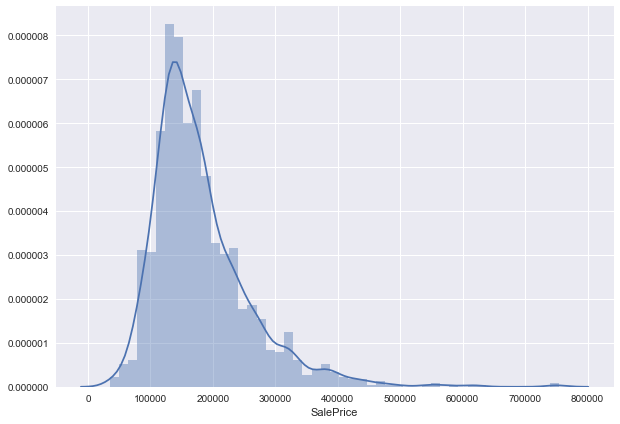

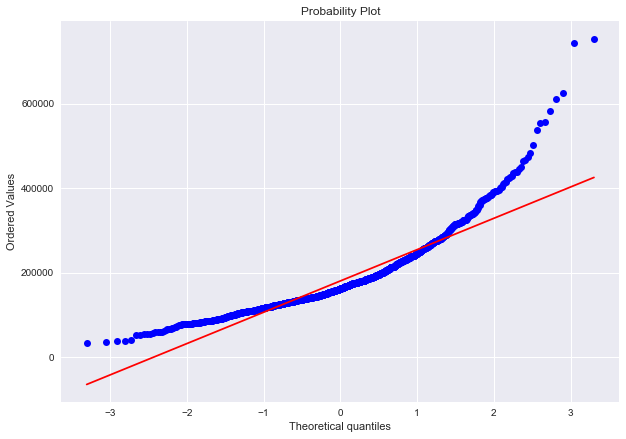

In [354]:
plt.figure(figsize=[10,7])
sns.distplot(train['SalePrice'])

fig = plt.figure(figsize=[10,7])
res = stats.probplot(train['SalePrice'], plot=plt)

The target variable is right skewed. As linear models should be normally distributed data so we need to transform this variable and make it more normally distributed.

In case of positive skewness, log transformations usually works well.

In [355]:
train['SalePrice'] = np.log(train['SalePrice'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


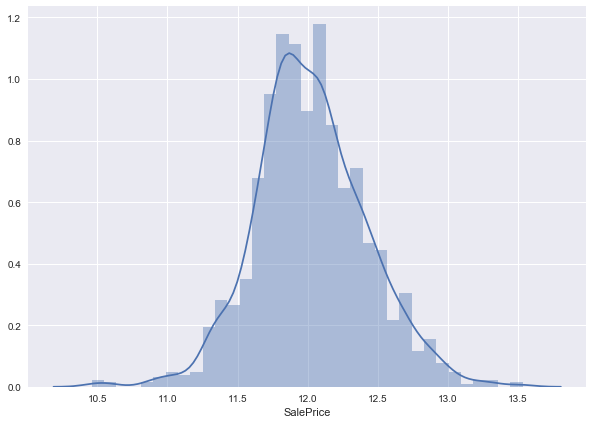

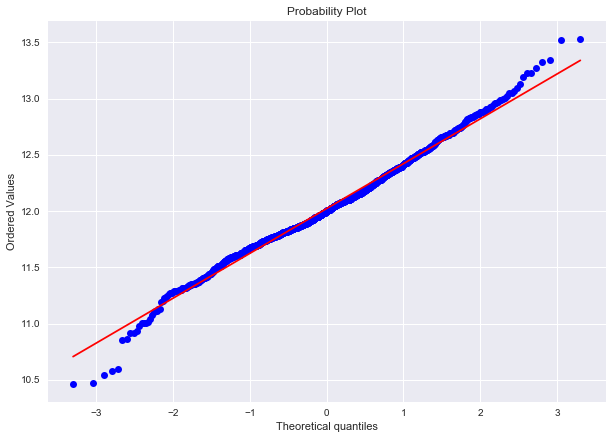

In [356]:
plt.figure(figsize=[10,7])
sns.distplot(train['SalePrice'])

fig = plt.figure(figsize=[10,7])
res = stats.probplot(train['SalePrice'], plot=plt)

The data is now normally distributed as we corrected skew.

Let's visualize correlation between features and Sale Price using Seaborn Heatmap, the best way to get a quick overview.

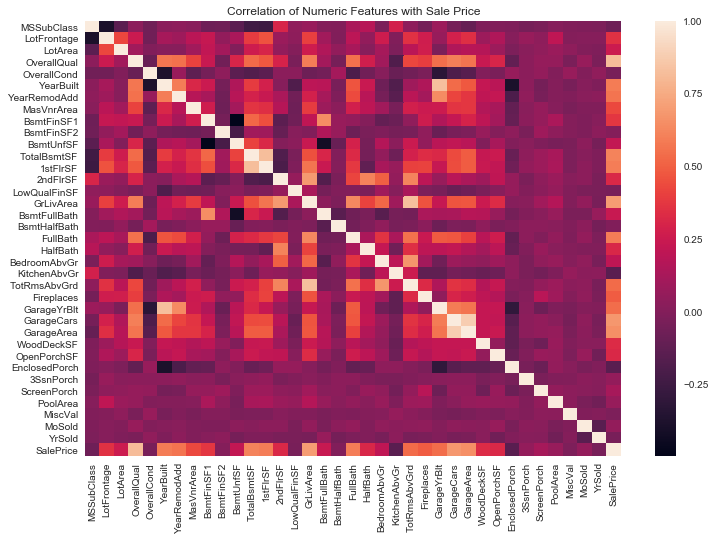

In [360]:
correlation= train.corr()

plt.figure(figsize=[12,8])
plt.title('Correlation of Numeric Features with Sale Price')
sns.heatmap(correlation)

As we can see in above heatmap that "OverallQual", "GrLivArea", "GarageCars" and "GarageArea" are strongly correlated to SalePrice.

Let's plot scatter plots of strongly correlated features using seaborn pairplot.

In [361]:
correlation=correlation['SalePrice'].sort_values(ascending=False).head(10)
strong_correlation= correlation.keys()
strong_correlation

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

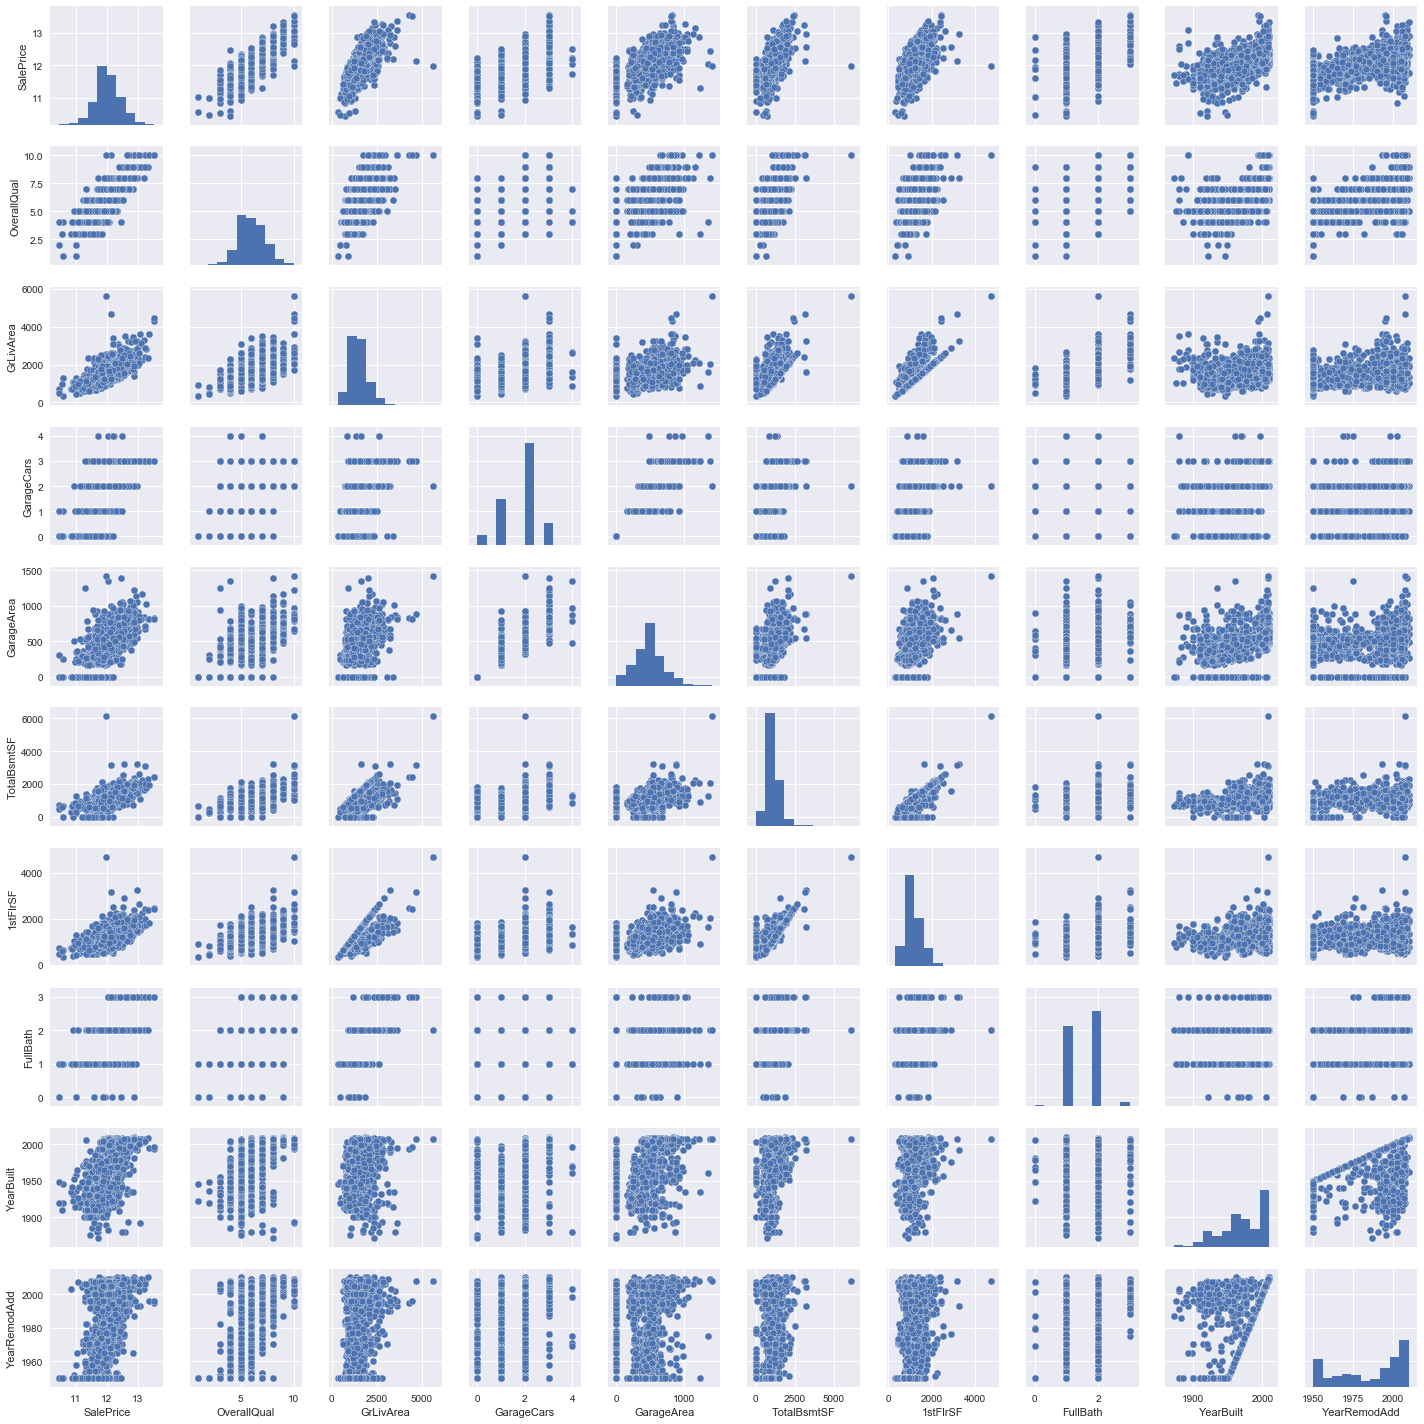

In [362]:
sns.pairplot(train[strong_correlation], size=2 )

#### Analysis of relationship of features with target
* As we can clearly see that 'OverallQual' and 'GrLivArea' are strongly correlated with our target variable, SalePrice.
* 'GarageCars' and 'GarageArea' are pointing to the same information about how much capacity a garage have so we will pick just one variable of high correlation i.e GarageCars.
* 'TotalBsmtSF' and '1stFlrSF' are also same, so we just need to pick one variable of high correlation i.e 'TotalBsmtSF'.
* 'TotRmsAbvGrd' and 'GrLivArea' are almost same so we got 'GrLivArea'.

In [363]:
features=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF', 'YearBuilt']

Let's move forward to missing data analaysis!

#### Missing Data
Things to be considered while analyzing missing values in data:
* How frequent is the missing data?
* Is missing data random or does it have a pattern?

In [364]:
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
Missing_val_analysis= pd.concat([total, percent], axis=1, join='outer', keys=['Total missing count', 'Percentage '])
Missing_val_analysis.head(20)

,Total missing count,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


* When more than 15% of data is missing we should remove such variable from our data instead of filling those values. 
* PoolQC, MiscFeature, Alley, Fence and FireplaceQu seem to be very unimportant as most of them are not aspects that we should consider while buying a house and maybe that's the reason why they're missing.
* GarageCond, GarageType, GarageYrBlt, GarageFinish, GarageQual have same no of missing values. We already considered the most important information regarding Garage so can drop these variables from our data.
* BsmtCond, BsmtQual as same as TotalBsmtSF so we don't need them.
* MasVnrArea and MasVnrType have strong correlation with YearBuilt and OverallQual which are already considered so we don't miss any information if we drop these variables from our data.
* Finally we are left with Electrical variable which contain a missing value so will drop that value and keep the variable.

Let's drop the unnecessary features that we've analyzed.

In [365]:
missing=train.isnull().sum().sort_values(ascending=False).head(18)
missing= missing.keys()
train.drop(missing, axis=1, inplace=True)
train.shape

(1460, 62)

Let's move forward to analyze categorical features of our data.

In [366]:
categorical= [f for f in train.columns if train.dtypes[f]=='object']
len(categorical)

28

Let's analyze how many 'Object' type categories each feature has.

In [367]:
i=1
for val in train:
    if train[val].dtypes=='object':
        print(i, ": ", val , " has " , len(train[val].unique()), " categories: ", train[val].unique(), " \n")
        i=i+1

1 :  MSZoning  has  5  categories:  ['RL' 'RM' 'C (all)' 'FV' 'RH']  

2 :  Street  has  2  categories:  ['Pave' 'Grvl']  

3 :  LotShape  has  4  categories:  ['Reg' 'IR1' 'IR2' 'IR3']  

4 :  LandContour  has  4  categories:  ['Lvl' 'Bnk' 'Low' 'HLS']  

5 :  Utilities  has  2  categories:  ['AllPub' 'NoSeWa']  

6 :  LotConfig  has  5  categories:  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']  

7 :  LandSlope  has  3  categories:  ['Gtl' 'Mod' 'Sev']  

8 :  Neighborhood  has  25  categories:  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']  

9 :  Condition1  has  9  categories:  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']  

10 :  Condition2  has  8  categories:  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']  

11 :  BldgType  has  5  categories:  ['

Let's convert these 'Object' type categories into 'int' type.

In [368]:
for i in train:
    if train[i].dtypes=='object':
        train[i]=pd.factorize(train[i])[0] + 1

In [369]:
i=1
for val in categorical:
        print(i, ": ", val , " has " , len(train[val].unique()), " categories: ", train[val].unique(), " \n")
        i=i+1

1 :  MSZoning  has  5  categories:  [1 2 3 4 5]  

2 :  Street  has  2  categories:  [1 2]  

3 :  LotShape  has  4  categories:  [1 2 3 4]  

4 :  LandContour  has  4  categories:  [1 2 3 4]  

5 :  Utilities  has  2  categories:  [1 2]  

6 :  LotConfig  has  5  categories:  [1 2 3 4 5]  

7 :  LandSlope  has  3  categories:  [1 2 3]  

8 :  Neighborhood  has  25  categories:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]  

9 :  Condition1  has  9  categories:  [1 2 3 4 5 6 7 8 9]  

10 :  Condition2  has  8  categories:  [1 2 3 4 5 6 7 8]  

11 :  BldgType  has  5  categories:  [1 2 3 4 5]  

12 :  HouseStyle  has  8  categories:  [1 2 3 4 5 6 7 8]  

13 :  RoofStyle  has  6  categories:  [1 2 3 4 5 6]  

14 :  RoofMatl  has  8  categories:  [1 2 3 4 5 6 7 8]  

15 :  Exterior1st  has  15  categories:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]  

16 :  Exterior2nd  has  16  categories:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]  

17 :  

Let's move forward to analyze correlation of these categorical features with SalePrice.

In [370]:
categorical.append('SalePrice')
len(categorical)

29

In [371]:
corr=train[categorical].corr()
corr['SalePrice'].sort_values(ascending=False).head(5)

SalePrice        1.000000
LotShape         0.286002
RoofStyle        0.139088
LotConfig        0.116668
SaleCondition    0.107169
Name: SalePrice, dtype: float64

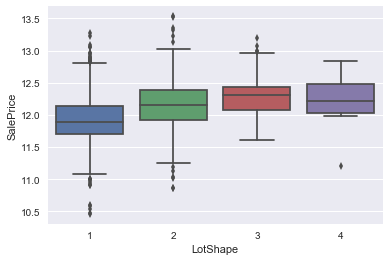

In [372]:
sns.boxplot(x='LotShape', y="SalePrice", data=train)

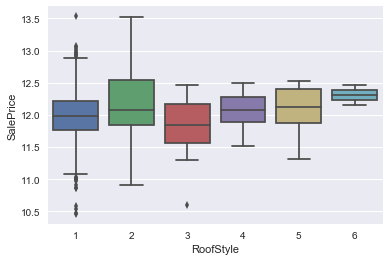

In [373]:
sns.boxplot(x='RoofStyle', y="SalePrice", data=train)

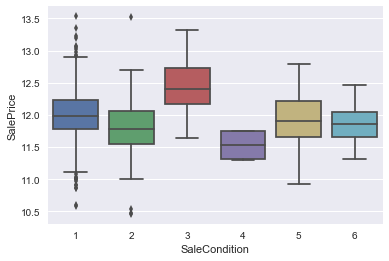

In [374]:
sns.boxplot(x='SaleCondition', y="SalePrice", data=train)

As we have seen that these categorical features aren't that much correlated with our target. Sale Price remains almost same for all the categories of these features. And these are the features people are less concerned about while buying a house. So we don't need to consider any of these features in building our model.

In [375]:
print("Features we have selected in Exploratory data analysis:\n", features)

Features we have selected in Exploratory data analysis:
 ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']


#### Model development

In [376]:
data= train[features]
data.shape

(1460, 6)

In [377]:
x=np.asarray(data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']])
y=np.asarray(data['SalePrice'])
x.shape, y.shape

((1460, 5), (1460,))

In [378]:
x

array([[   7, 1710,    2,  856, 2003],
       [   6, 1262,    2, 1262, 1976],
       [   7, 1786,    2,  920, 2001],
       ...,
       [   7, 2340,    1, 1152, 1941],
       [   5, 1078,    1, 1078, 1950],
       [   5, 1256,    1, 1256, 1965]], dtype=int64)

As we can see that our predictors aren't on same scale , so we need to standardize these variables using sklearn StandardScaler.

In [379]:
scaler= StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [380]:
x

array([[ 0.65147924,  0.37033344,  0.31172464, -0.45930254,  1.05099379],
       [-0.07183611, -0.48251191,  0.31172464,  0.46646492,  0.15673371],
       [ 0.65147924,  0.51501256,  0.31172464, -0.31336875,  0.9847523 ],
       ...,
       [ 0.65147924,  1.56964722, -1.02685765,  0.21564122, -1.00249232],
       [-0.79515147, -0.83278768, -1.02685765,  0.04690528, -0.70440562],
       [-0.79515147, -0.49393395, -1.02685765,  0.45278362, -0.20759447]])

Let's divide our data set into two, train and test set.

In [381]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.3, random_state=4)

#### Linear Regression without regularization

Linear Regression without using high order polynomials.

In [382]:
LR= LinearRegression()

LR.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Since our model is trained, let's predict SalePrice on test set.

In [383]:
prediction=LR.predict(xtest)
prediction[:5]

array([12.25791162, 12.21317951, 11.86614572, 11.87164704, 11.44508858])

#### Model Evaluation

When evaluating our models, not only do we want to visualise the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

* R^2 / R-squared
* Mean Squared Error (MSE)

##### R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line. The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

###### Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ)

In [384]:
print("Error by R2_Score: %.2f " % r2_score(prediction, ytest))

print("Mean squared error: %.2f" % mean_absolute_error(ytest, prediction))

print("Mean squared error: %.2f" % mean_squared_error(ytest, prediction))

Error by R2_Score: 0.80 
Mean squared error: 0.11
Mean squared error: 0.02


How do we visualise a model for Multiple Linear Regression? This gets a bit more complicated because we can't visualise it with regression plot.

One way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [386]:
def plot_distplot(prediction):
    plt.figure(figsize=[10,7])


    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(prediction, hist=False, color="b", label="Fitted Values" , ax=ax1)


    plt.title('Actual vs Fitted Values for Price')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

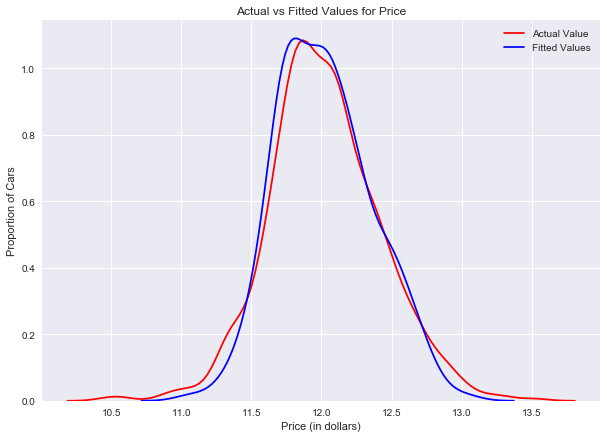

In [387]:
plot_distplot(prediction)

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

Let's again train our model using high order polynomials.

In [388]:
#using polynomial of 3rd order

polynomial= PolynomialFeatures(3)
x_poly= polynomial.fit_transform(x)

In [389]:
xtrain_p, xtest_p, ytrain_p, ytest_p= train_test_split(x_poly, y, test_size=0.3, random_state=4)

In [390]:
LR_= LinearRegression()

LR_.fit(xtrain_p,ytrain_p)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [391]:
prediction_poly=LR_.predict(xtest_p)

print("Error by R2_Score: %.2f " % r2_score(prediction_poly, ytest_p))

print("Mean squared error: %.2f" % mean_absolute_error(ytest, prediction_poly))

print("Mean squared error: %.2f" % mean_squared_error(ytest, prediction_poly))

Error by R2_Score: 0.82 
Mean squared error: 0.11
Mean squared error: 0.02


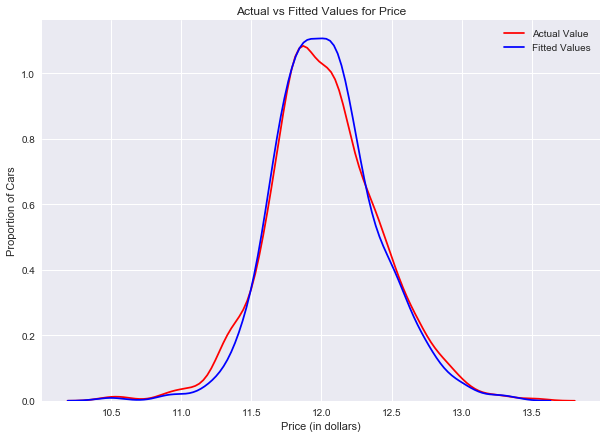

In [392]:
plot_distplot(prediction_poly)